In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pylab
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist['data'], mnist['target']

In [5]:
def plot_digit(image_data):
  image = image_data.reshape(28,28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

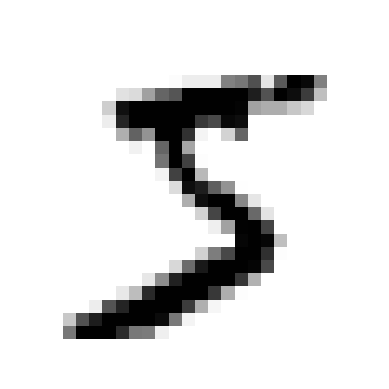

In [6]:
un_digito = X[0]
plot_digit(un_digito)

In [7]:
y = y.astype(int)
y[0]

5

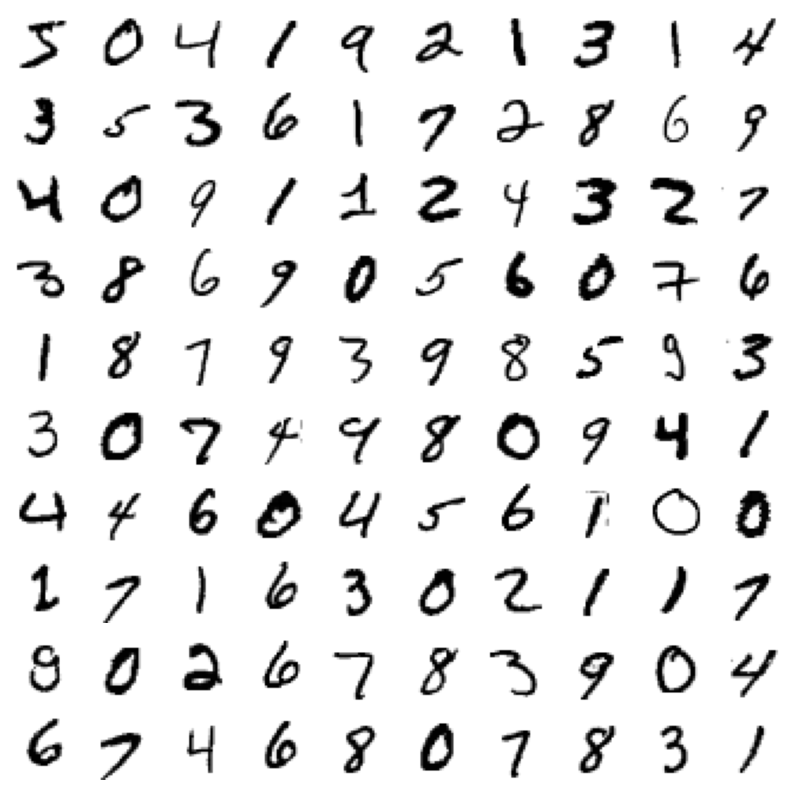

In [8]:
plt.figure(figsize=(10,10))
for i, image_data in enumerate(X[:100]):
  plt.subplot(10, 10, i+1)
  plot_digit(image_data)
plt.show()

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
y_train_5

array([ True, False, False, ...,  True, False, False])

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_5)


SGDClassifier()

In [12]:
un_digito = X[17]
sgd_clf.predict([un_digito])

array([False])

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95865, 0.9685 , 0.96475])

In [14]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [15]:
n5_clf = Never5Classifier()
cross_val_score(n5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53033,  1546],
       [  837,  4584]], dtype=int64)

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)

0.7477977161500816

In [19]:
recall_score(y_train_5, y_train_pred)

0.8456004427227449

In [20]:
f1_score(y_train_5, y_train_pred)

0.7936975153666349

In [21]:
un_digito = X[0]
y_scores = sgd_clf.decision_function([un_digito])
y_scores

array([8031.74108807])

In [22]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
y_scores

array([  8626.53827292, -15867.85808846, -36294.00733173, ...,
        10838.78614222, -20622.2330106 , -26407.93779177])

In [23]:
threshold = 5000
y_pred_new = (y_scores > threshold)

In [24]:
print(precision_score(y_train_5, y_pred_new))
print(recall_score(y_train_5, y_pred_new))

0.8984215885947047
0.6509869027854639


In [25]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

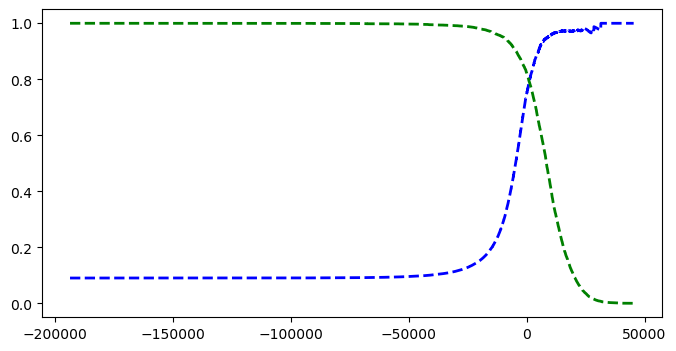

In [26]:
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g--", label="Recall", linewidth=2)

Text(0, 0.5, 'Precision')

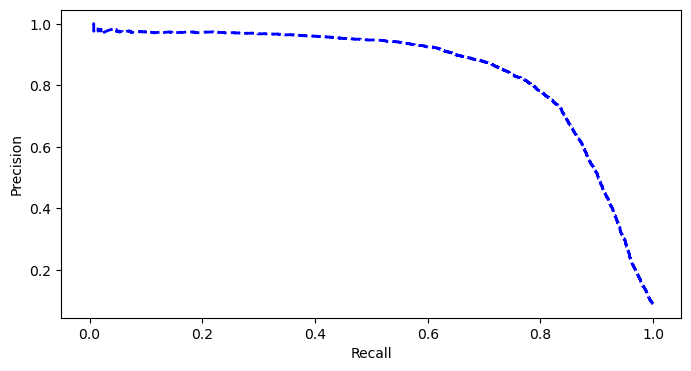

In [27]:
plt.figure(figsize=(8,4))
plt.plot(recalls, precisions, "b--", label="Precision/recall", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")

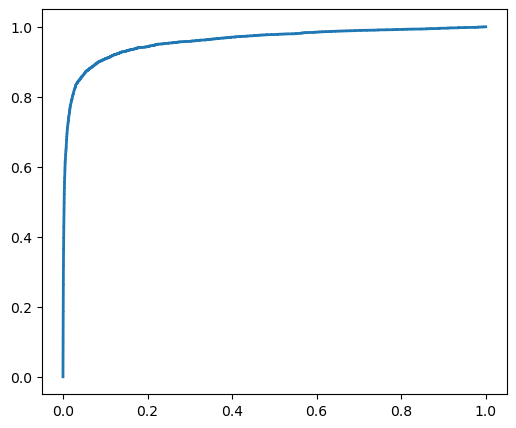

In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_train_5, y_scores)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")

In [29]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9597742656666814

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")
y_probas_forest[:4]

array([[0.12, 0.88],
       [0.99, 0.01],
       [0.98, 0.02],
       [1.  , 0.  ]])

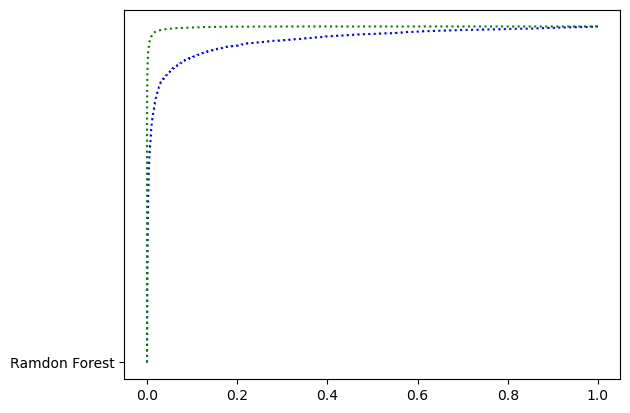

In [31]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, "g:", "Ramdon Forest")

In [32]:
y_train_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
print(roc_auc_score(y_train_5, y_scores_forest))
print(precision_score(y_train_5, y_train_forest))
print(recall_score(y_train_5, y_train_forest))

0.9984111227353648
0.9892586352148273
0.8664453052942261


In [33]:
un_digito = X[0]
from sklearn.svm import SVC

svc_clf = SVC()
svc_clf.fit(X_train[:2000], y_train[:2000])
print(svc_clf.predict([un_digito]))
un_digito_scores = svc_clf.decision_function([un_digito])
un_digito_scores.round(2)

[5]


array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [34]:
clase_id = un_digito_scores.argmax()
clase_id

5

In [35]:
print(f"el score máximo es el del elemento de orden {clase_id} que vale {un_digito_scores[0][clase_id]} \
 y corresponde a la clase {svc_clf.classes_[clase_id]}")

el score máximo es el del elemento de orden 5 que vale 9.301575971974335  y corresponde a la clase 5


In [36]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train[:2000], y_train[:2000])
ovr_clf.predict([un_digito])

array([5])

In [37]:
sgd_clf = SGDClassifier()
#sgd_clf.fit(X_train, y_train)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8758, 0.869 , 0.8699])

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.90395, 0.8927 , 0.9053 ])